In [1]:

import pandas as pd
import geopandas as gpd
import hvplot.pandas
import folium

In [2]:

geojson_path = 'Traffic_Count_Locations.geojson'

# traffic_count_locations = pd.read_csv("Traffic_Count_Locations.csv")
# traffic_count_locations = pd.read_csv("Traffic_Volume.csv")
# traffic_count_locations.head()

#df = gpd.read_file('Traffic_Volume.geojson')
#df = gpd.read_file('Traffic_Volume.geojson')
df = gpd.read_file(geojson_path)
df.head(5)

,OBJECTID,TFM_ID,TFM_LRS_ID,TFM_DESC,TFM_TYP_DE,MOVEMENT_T,SITE_DESC,ROAD_NBR,DECLARED_R,LOCAL_ROAD,...,AADT_TRUCK,PER_TRUCKS,HF_NUMBER,HLINK_NUMB,HF_ROUTE,HF_ROUTE_D,HF_DESCRIP,HF_SEQUENC,RAMP_TYPE,geometry
0,1,14304,36573,PUNT RD N OF ROWENA PDE,INTERSECTION,All Moves,PUNT RD/ROWENA PDE,2080,HODDLE HIGHWAY,PUNT ROAD,...,NaN,NaN,218,1514,2,1,PUNT RD S BD BTWN BRIDGE RD & BRUNTON AVE,13.0,ROAD,POINT (144.98965 -37.81984)
1,2,14912,36606,BLACKBURN RD N OF ANDERSONS CREEK RD,INTERSECTION,All Moves,BLACKBURN RD/ANDERSONS CREEK RD,5307,BLACKBURN ROAD,BLACKBURN ROAD,...,NaN,NaN,2732,3938,312,1,BLACKBURN RD S BD BTWN KING ST & ANDERSONS CRE...,1.0,ROAD,POINT (145.16413 -37.77695)
2,3,58602,36510,BENDIGO-MARYBOROUGH RD SW BD BTW MARYBOROUGH-D...,MIDBLOCK,All Moves,BENDIGO-MARYBOROUGH RD NBTW MARYBOROUGH-DUNOLL...,5200,BENDIGO-MARYBOROUGH ROAD,MARYBOROUGH-DUNOLLY ROAD,...,80.0,0.16,9913,3580,498,1,MARYBOROUGH-BENDIGO ROAD S Bd btwn MARYBOROUGH...,7.0,ROAD,POINT (143.76271 -36.99559)
3,4,860,36609,DORSET_RD N of CANTERBURY_RD,INTERSECTION,Left Missing,DORSET RD/CANTERBURY RD,5784,DORSET ROAD,DORSET ROAD,...,NaN,NaN,3520,5282,388,1,DORSET RD S BD BTWN EASTFIELD RD & CANTERBURY RD,7.0,ROAD,POINT (145.28760 -37.82563)
4,5,2565,36543,SYDNEY RD N OF JUKES RD,INTERSECTION,All Moves,SYDNEY RD/JUKES RD,5500,COBURG-CRAIGIEBURN ROAD,SYDNEY ROAD,...,NaN,NaN,12817,6626,1620,1,SYDNEY RD S BD BTWN METROPOLITAN RING RD & BOX...,93.0,ROAD,POINT (144.96006 -37.70073)


In [3]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64276 entries, 0 to 64275
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    64276 non-null  int64   
 1   TFM_ID      64276 non-null  int64   
 2   TFM_LRS_ID  64276 non-null  object  
 3   TFM_DESC    64276 non-null  object  
 4   TFM_TYP_DE  64276 non-null  object  
 5   MOVEMENT_T  64276 non-null  object  
 6   SITE_DESC   64276 non-null  object  
 7   ROAD_NBR    64276 non-null  int64   
 8   DECLARED_R  64276 non-null  object  
 9   LOCAL_ROAD  64276 non-null  object  
 10  DATA_SRC_C  64276 non-null  object  
 11  YEAR_SINCE  23972 non-null  float64 
 12  LAST_YEAR   23972 non-null  float64 
 13  DATA_SOURC  64276 non-null  object  
 14  TIME_CATEG  64276 non-null  object  
 15  AADT_ALLVE  23083 non-null  float64 
 16  AADT_TRUCK  13568 non-null  float64 
 17  PER_TRUCKS  13562 non-null  float64 
 18  HF_NUMBER   64276 non-null  int64   
 

In [4]:
# df = traffic_count_locations.head(5)

plot = df.hvplot.points(
    x='X', y='Y', geo=True, 
    size='MOVEMENT_T', color='car_count', 
    tiles='CartoLight', cmap='Reds', 
    frame_width=700, frame_height=500, 
    title='Car Counts by Location'
)


c:\Users\yslav\.conda\envs\dev\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


<Axes: >

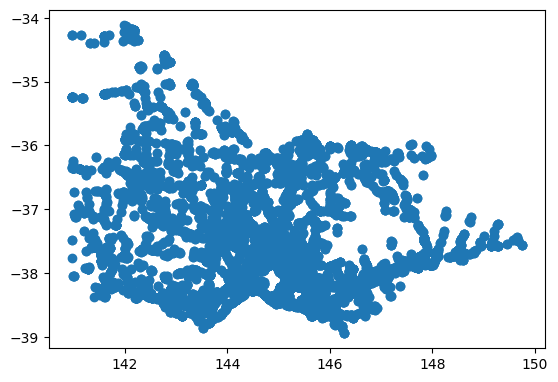

In [5]:
# plot

df.plot()


In [6]:
m = folium.Map(location=[0, 0], zoom_start=2)
# folium.GeoJson(geojson_path).add_to(m)
folium.GeoJson(df.head(100).to_json()).add_to(m)


In [7]:
m
#m.save('interactive_geojson_map.html')